# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

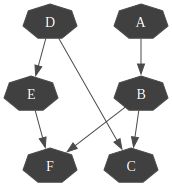

In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(beta=1e-10,oneNet=False,keepZeroes=False)

In [5]:
cr.computeBinaryCPTMinMax()

In [6]:
print(cr)


A:Range([0,1])
<> : [[0.565254 , 0.434746] , [0.0116094 , 0.988391]]

B:Range([0,1])
<A:0> : [[0.520292 , 0.479708] , [0.520228 , 0.479772]]
<A:1> : [[0.575252 , 0.424748] , [0.575223 , 0.424777]]

C:Range([0,1])
<B:0|D:0> : [[0.365273 , 0.634727] , [0.364496 , 0.635504]]
<B:1|D:0> : [[0.662238 , 0.337762] , [0.66223 , 0.33777]]
<B:0|D:1> : [[0.556208 , 0.443792] , [0.55617 , 0.44383]]
<B:1|D:1> : [[0.262644 , 0.737356] , [0.257664 , 0.742336]]

D:Range([0,1])
<> : [[0.824869 , 0.175131] , [0.00149712 , 0.998503]]

E:Range([0,1])
<D:0> : [[0.230718 , 0.769282] , [0.221053 , 0.778947]]
<D:1> : [[0.779033 , 0.220967] , [0.779031 , 0.220969]]

F:Range([0,1])
<E:0|B:0> : [[0.249194 , 0.750806] , [0.0611056 , 0.938894]]
<E:1|B:0> : [[0.604714 , 0.395286] , [0.604695 , 0.395305]]
<E:0|B:1> : [[0.86851 , 0.13149]]
<E:1|B:1> : [[0.67171 , 0.32829] , [0.671703 , 0.328297]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [7]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False,keepZeroes=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return gnb.getInference(cr,engine=ielbp)

In [8]:
for eps in [1,1e-1,1e-2,1e-3,1e-10]:
  gnb.flow.add(showNoisy(bn,eps),caption=f"noise={eps}")
gnb.flow.display()